# Deep Learning @ UWr 2021

**Lecture 02**

We begin our journey to learn neural networks. The first few lectures will deal with practical aspects of neural network implementation:
- First, we will learn what changes with added depth, and how to implement a neural network.
- Then, we will learn how to fit neural networks to data. This is somewhat difficult because the optimization problem that is solved during neural network training is non-convex.
- Finally, we will learn how to regularize neural networks, that is how to make then fit well not only the training data, but also the testing data.


## Quick recap: logistic regression

We will soon see that a neural network can be interpreted as an extended regression model. Thus we will first remind ourselves on the basics of logistic regression. For a more detailed introduction to Logistic Regression see my [Machine Learning course](github.com/janchorowski/ml_uwr).

Consider a binary classification problem in which a sample $x\in\mathbb{R}^D$ has to be assigned to one of two classes $y\in\{0,1\}$.

In logistic regression, we define a model parameterized with weights $w\in\mathbb{R}^D$ and a bias term $b\in\mathbb{R}$ which computes a numerical score:

$$
z(x; w, b) = b + \sum_{j=1}^D x_j w_j= xw^T + b
$$

Logistic regression then assigns a data sample $x$ to the positive class if $z(x)\geq 0$ and to the negative class if $z(x) < 0$.

Logistic regression has a probabilistic interpretation in which we want that

$$
p(y=1|x; w, b) = \sigma(z) = \frac{1}{1+ e^{-z(x; w, b)}} = \frac{1}{1+ e^{-(xw^T + b)}}
$$

An application of the Maximum Likelihood principle then yields the cross-entropy loss function:

$$
l(w, b) = -\sum_{i=1}^{N}y^{(i)}\log p(y=1|x^{(i)}; w, b) + (1-y^{(i)})\log  p(y=0|x^{(i)}; w, b)
$$

where $x^{(i)}, y^{(i)}$ represent training data samples.

The logistic regression is then trained (fited to data) by minimizing the loss function over $w$ and $b$. This is typically accomplished using numerical, gradient-based optimization algorithms. The optimization problem is convex, and can be efficiently and exactly solved.

## From regressions to Deep Neural Networks

During the introductory lecture we have defined an artificial neuron (McCulloch–Pitts model) as a computational unit which reads $n$ inputs $x_1,...,x_n$ and computes a single output $o$ using two operations:
1. Computing a weighted sum of its inputs:
   
   $a = b + \sum_{i=1}^n w_i x_i = b + x w^T$

   where $w=[w_1, .., w_n]$ is called a _weight vector_ and $b$ is a _bias_ term.

2. Applying an activation function:

   $o = \sigma(a)$

Despite its simplicity, a single artificial neuron implements regression models:
1. When $\sigma(a)=a$ a single neuron is equivalent to linear regression.
2. When $\sigma(a) = \frac{1}{1+e^{-a}}$ a single neuron is equivalent to logistic regression.

A neural network is a bunch of interconnected neurons (formally we require that the neurons form a DAG):

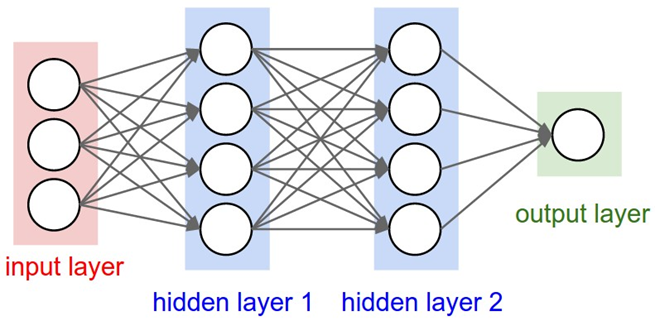

Looking at the image, we can indicate 3 layers of neurons:
- 1st layer (hidden layer 1) neurons read in the input, and compute some outputs (called hidden or latent features).
- 2nd layer (hidden layer 2) neurons rad in the latent features computed by the first layer, then transform them.
- finally, the output layer (third layer of the network) assemples the features of the second layer into an output.

Please note, that the notion of a layer is somewhat flexible. The architecture presented in the picture is the most basic neural network, but more complicated connectivity patterns are possile and often used.

The multilayer network can be treated as logistic-regression on featurres extracted themselves using logistic regressions which compute useful, intermediate representations. It's [turtles all the way down](https://en.wikipedia.org/wiki/Turtles_all_the_way_down).

## Why are hidden layers necessary?

Consider a binary classification problem. Let the input be $2$-dimensional. What relations can be learned by linear regression?

The decision rule is $y=1 \text{ iff } x w^T + b \geq 0$. 

Graphically, this cuts the 2D plane with a single line. If the data are not linearly separable, logistic regression will not be able to fit them.

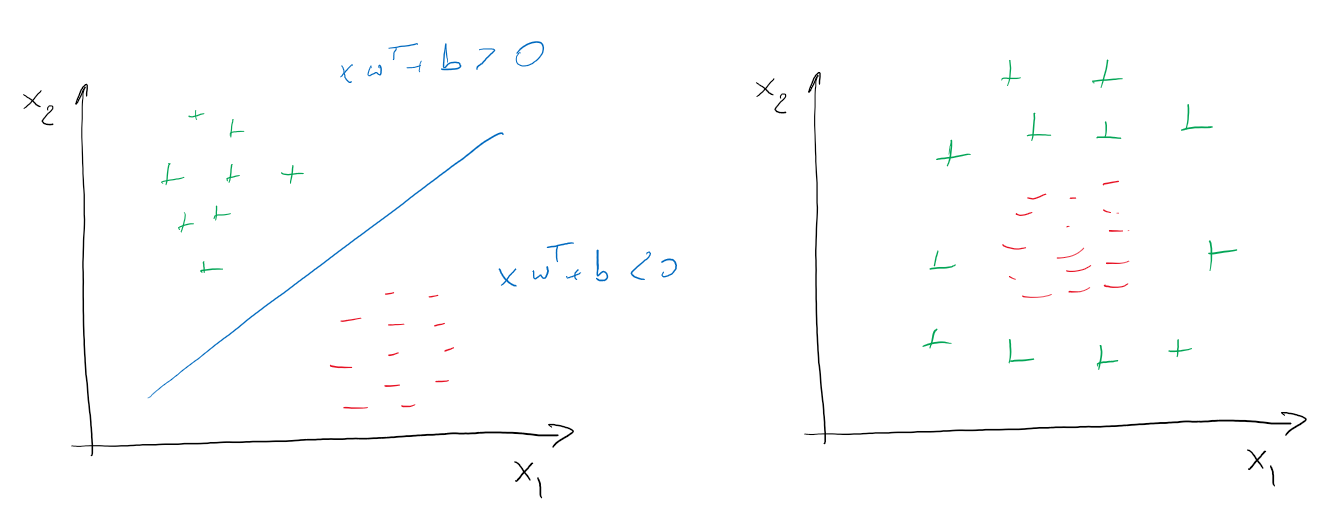

The data on the left can be separated using  single line. However, the data on the right can't.

On the other hand, we can delimit the red area using some lines, as presented below:

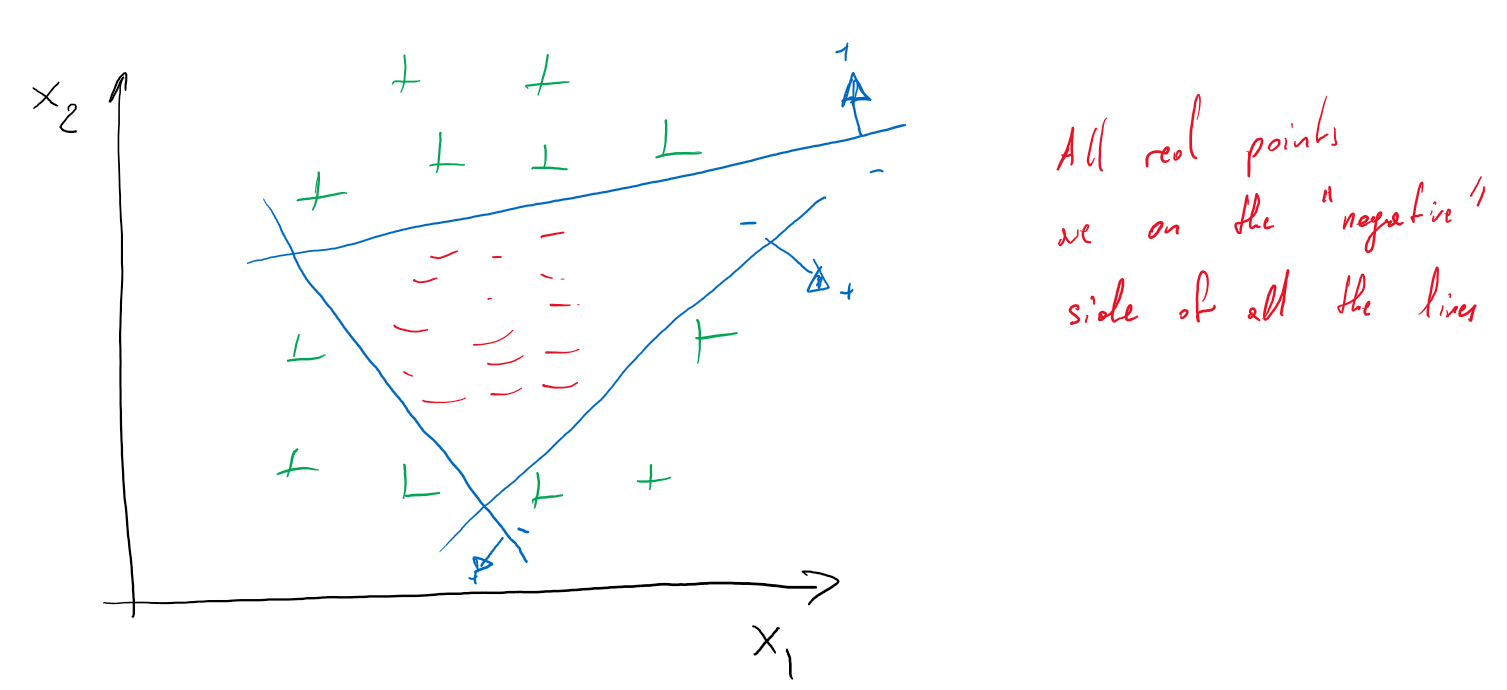

Using the auxiliary blue lines, separation of red minuses from the green pluses is easy: all red minuses lie on the negative side of all three blue lines.

You can play with small networks on 2D plan at https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html.

If we encode points to the positive side of a line $l_i$ (indicated by the little arrow) as 1, and points on the negative side as 0, then the decision rule is: predict a green plus, if the sum of line sides is at least one. This can be easily computed using a single neuron.

Another classical example of a minimal problem that requires adding a hidden layer is the XOR problem:

$x_1$ | $x_2$ | $y$
:----:|:-----:|:---:
0 | 0 | 0 
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

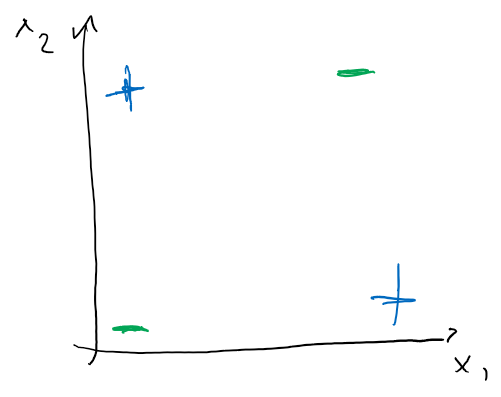

Again, we can introduce some additional lines (neurons):

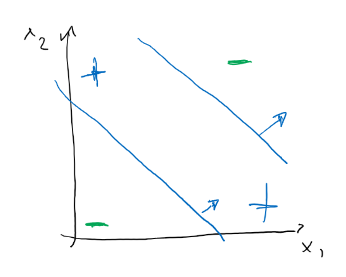

These two lines compute the AND and OR functions:

$$
x \text{ OR } y = [x + y > 0.5] \\
x \text{ AND } y = [x + y > 1.5]
$$
where $[]$ is the indicator function.

Representing each data sample by the side of the lines (or equivalently encoding the date as AND and XOR of $x_1$ and $x_2$ allows linear separability:

$x_1$ | $x_2$ | $x_1$ OR $x_2$ | $x_1$ AND $x_2$ | $y$
:----:|:-----:|:--------------:|:----------------:|:---:
0 | 0 | 0 | 0 | 0 
0 | 1 | 1 | 0 | 1
1 | 0 | 1 | 0 | 1
1 | 1 | 1 | 1 | 0


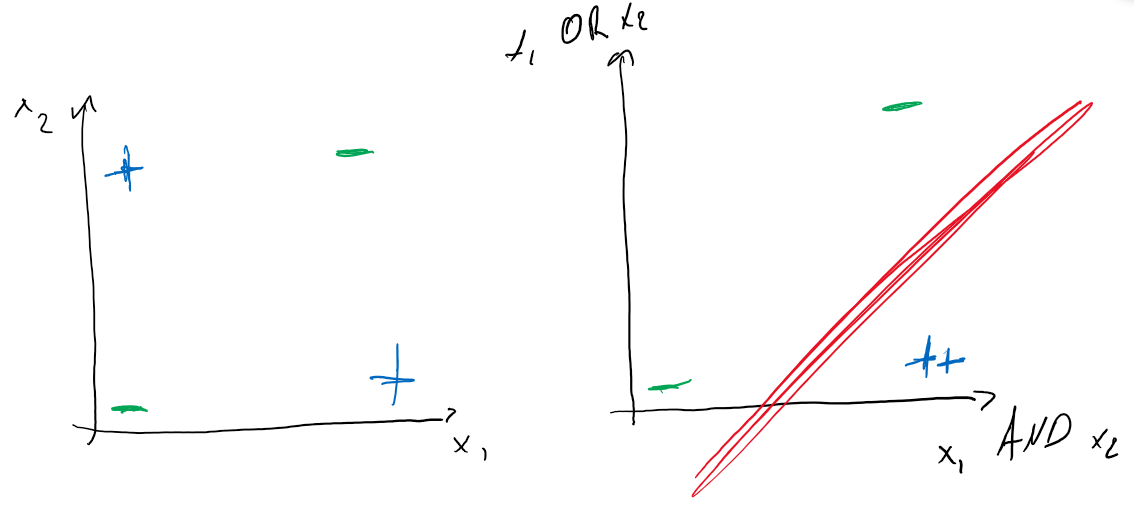

Note that since XOR and AND are just lines, we can compute them using single neurons. Thus, we can assemble a small neural network which solves XOR:

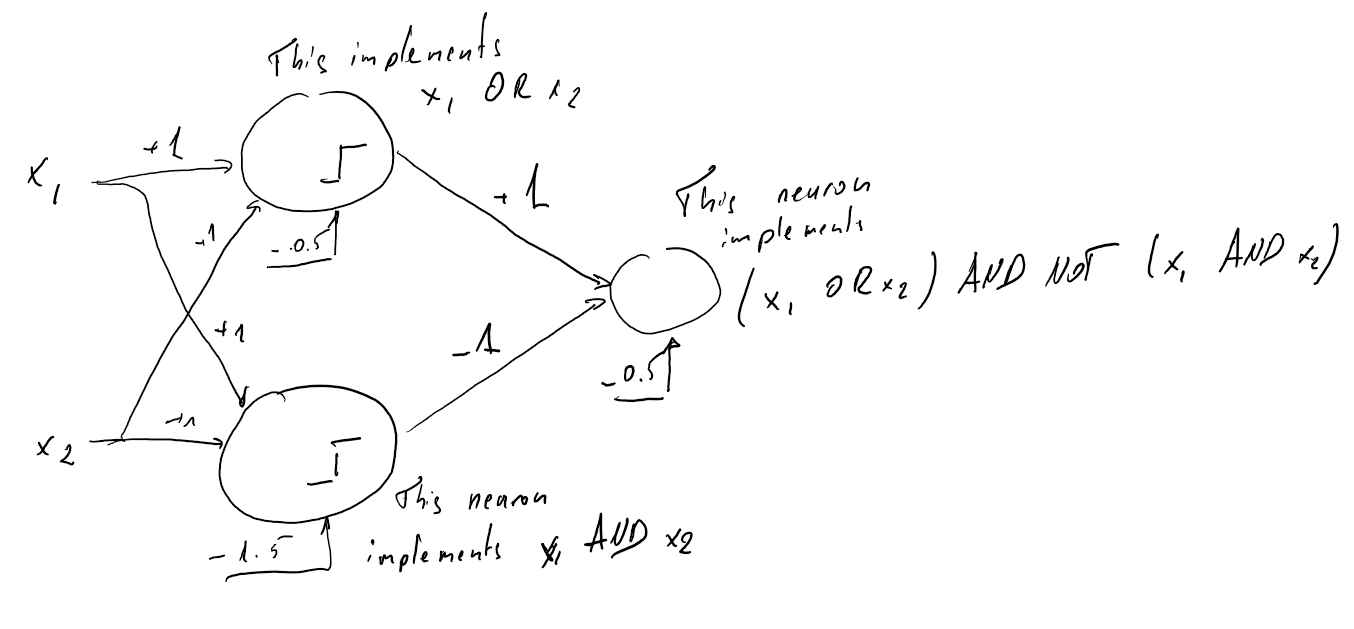

## Neural networks, boolean functions, universal approximation theorem

The XOR example has demonstrated us that for some problems we need a hidden layer. However, is a single hidden layer sufficient? Or are they some problems that would require more layers?

For simplicity, let's stay in the realm of boolean functions: $\{0,1\}^D \rightarrow \{0,1\}$. First, observe that a single neuron can easily implement a multiway AND or OR function:

$$
\text{OR}(x_1, x_2, ..., x_n) = \left[\sum_{i=1}^n x_i > 0.5\right] \\
\text{AND}(x_1, x_2, ..., x_n) = \left[\sum_{i=1}^n x_i > n - 0.5\right]
$$

where again $[\cdot]$ denotes the indicator function.

Now recall that any boolean function can write down its truth table


$i$ | $x_1$ | $x_2$ | ... | $x_D$ | $y$
:--:|:-----:|:-----:|:---:|:-----:|:---:
0   | 0     | 0     | ... |   0   | $y^(1)$
1   | 0     | 0     | ... |   1   | $y^(2)$
    |       |       | ... |       | 
$2^D$| 1    | 1     | ... |   1   | $y^{(2^D)}$


The Disjunctive Normal Form is simply an OR of all the rows of the truth table for which $y=1$:

$$
y = \bigvee_{i: y^i=1}\left(x_1=x_1^{(i)} \wedge x_2=x_2^{(i)} \wedge ...  \wedge x_D=x_D^{(i)} \right)
$$

This can be implemented using a neural network whose hidden layer contains one neuron for each of the AND clauses, with weigths set to 1 or -1 depending on thether the clause uses a literal or its negation.

Finally, the output layer implements a gigantic OR neuron.

Thus, a neural network with a sufficiently wide (perhaps exponentially wide with data dimensionality) hidden layer can implement any boolean function.

This shows that the addition of a single hidden layer is a major change: we take a regression model, capable only of linear data separation, and a single layer suffices to express any pattern the data may exhibit.

The **universal approximation theorem** is more general. It states that a neural network with one sufficiently large hidden layer can represent any real-valued function with arbitrary precision.

The intuition on this propery is that we can use hidden neurons to divide the data domain into small regions, then set the values in these regions using the weigths in the output layer. For a 1D real-valued function this can easily be visualised. Assume the output reads two neurons with opposite weights. Together, they form a "traveling bump" whose edges are set by the biases of the two hidden neurons, edge steepness is set by the hidden neuron weigths, and final value is set by the output weigths. Clearly, any function can be reconstructed from sufficiently many such bumps.

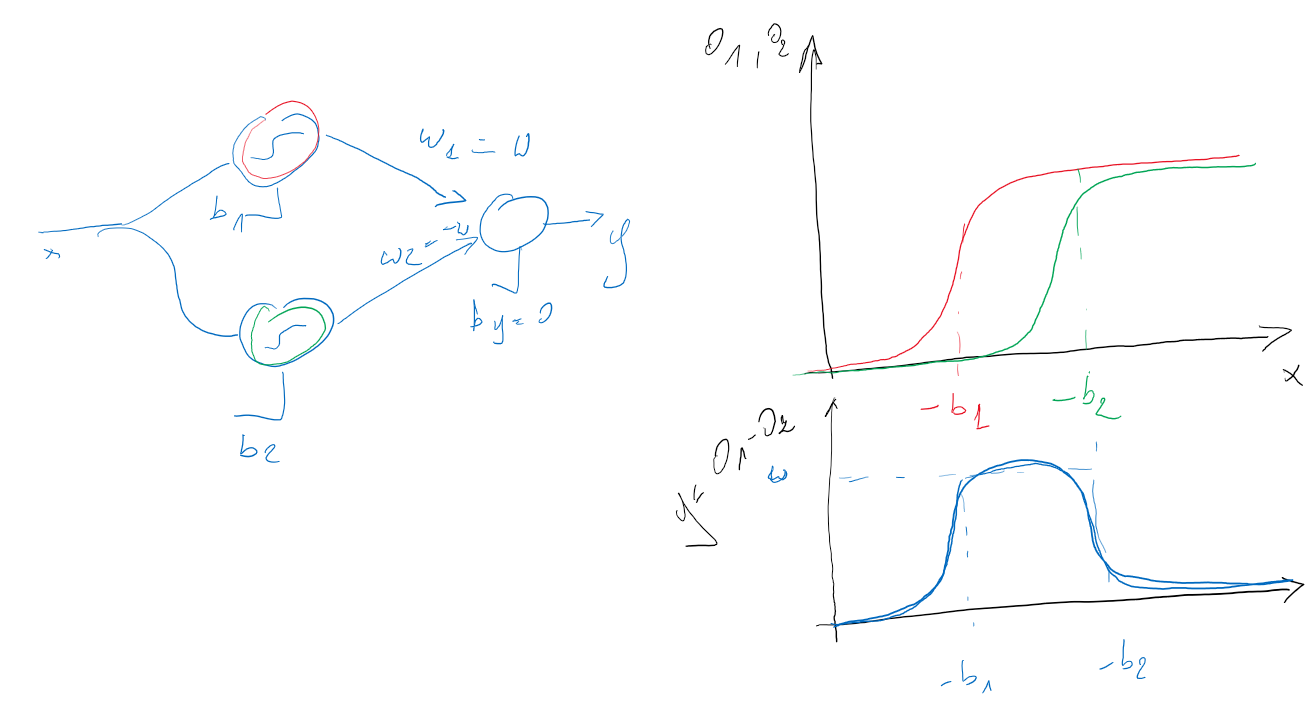

The main intuition which stems from the universal approximation theorem is that wide networks operate similarly to nearest neighbor models: in the limit they can devote several neuron of the hidden layer to each training example, effectively tabulating the dataset. Of course, such a network may not generalize to a test set.

### Theoretical hardness of training deep neural networks

Finally, we will now show that the addition of hidden layers radically changes the nature of the optimization problem solved during network training.

Consider a boolean function in CNF (Conjunctive Normal Form). It can be easily implemented using a neural network: the hidden layer contains OR neurons, while the output layer computes an AND function.

Lets add an input layer to this network, as shown in the picture below:

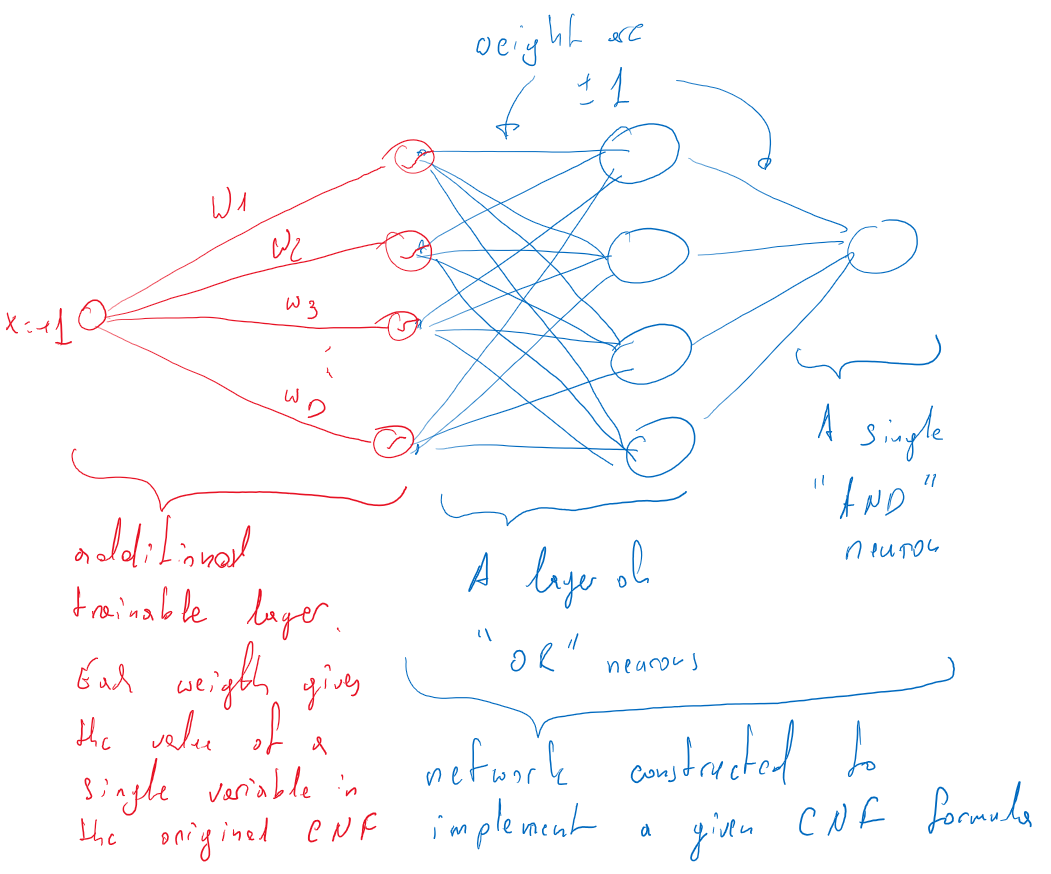

The weigths in the added layer are the only parameters that will be trained. However, please note that if we are able to find weights for which $net(1)=1$ we have effectively found a variable assignment which satisfies the CNF formula. However, CNF satisfiability is an NP-hard problem. 

Intuitively, this shows that adding a hidden layer to regression has dramatically increased its expressive power, however at the cost of complicated network training.

We souldn't be scared of training neural netowrks though. While training them is considerably harder than fitting shallow models, it is doable and commonly done. Moreover, somewhat counterintuitively, training larger (especially wider) nwetorks is easier - when the model has lots of capacity it is usually easy to find some parameetrs that can be changed to improve data fit.

## Training Deep Learning models

As we have seen, neural networks are models in which a large set of simple computational units (the neurons) are connected into a larger computation. Each neuron has some parameters (namely its weigths and bias, jointly called parameters) which can be set such that the network, as a whole, implements the desired input-output relation.

Similarly to regression models, our tool of choice for setting the parameters will be numerical optimization. Tu use it we must make sure that the function implemented by the network is _smooth_, that is it has to have a gradient with respect to the parameters. 

To ensure network smoothness we must use neurons with smooth activation functions. Thus rather than using a hard threshold, or indicator activations, one can use e.g. the logistic sigmoid  function:

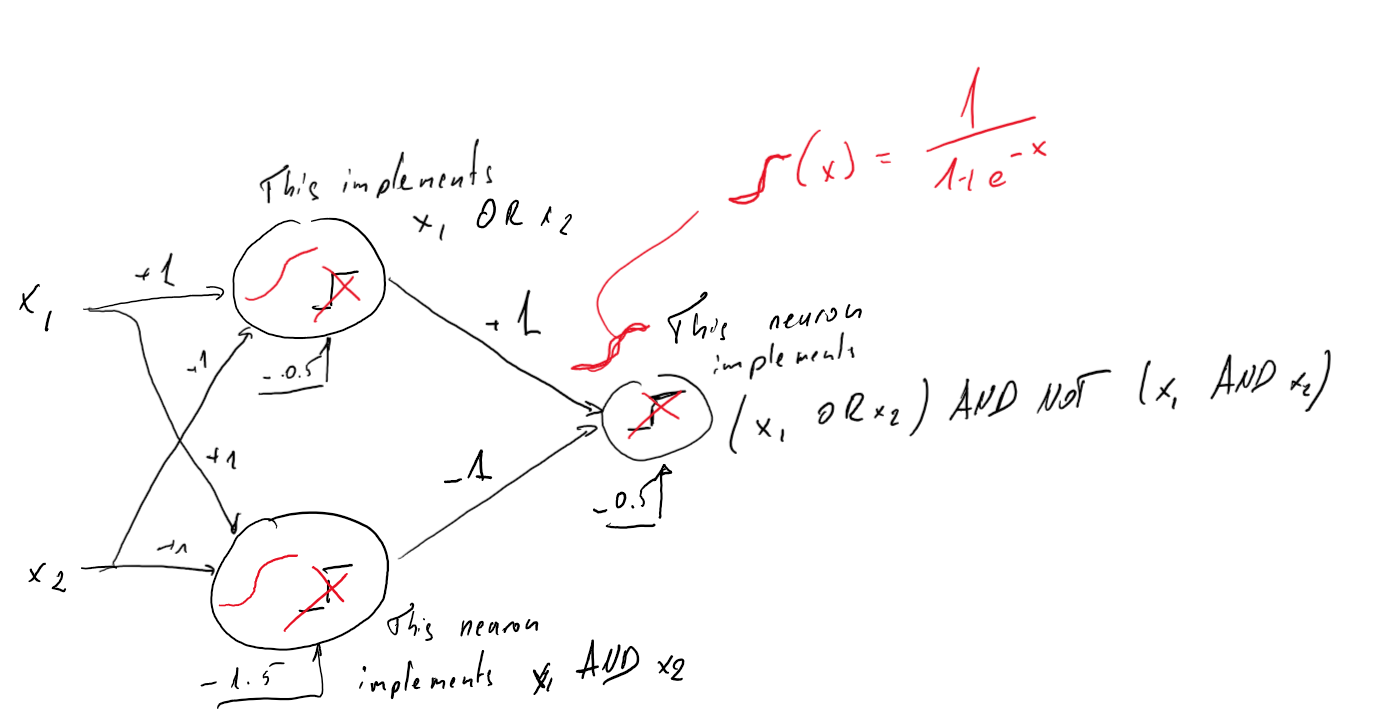

Please note, that in practice we will relax the requirement on activation function smoothness, and will only require it almost everywhere. For instance, a very popular activation function, called ReLU is $ReLU(z) = \max(0, z)$ which has a singularity at 0. Despite this, ReLU networks can be trained using gradient-based metohds.

### Error backpropagation

We will set the parameters of the neural network using steepest gradietn descent. However, this requires computing the gradient of the loss with respect to network parameters. The **error backpropagation algorithm** relies on systematic application of the [chain rule for differentiation](https://en.wikipedia.org/wiki/Chain_rule) to compute all required derivatives for any neural network architecture.

The chain rule allows us to compute derivatives of function composition. Consider an output $l$ of a function $f(x)$ computed in a few steps:
1. $u = f_u(x)$
2. $v = f_v(x)$
3. $s = f_s(u,v)$
4. $l = f_l(s)$

We can compute the derivatives $\frac{\partial l}{\partial s}$, $\frac{\partial l}{\partial v}$, $\frac{\partial l}{\partial x}$, $\frac{\partial l}{\partial x}$ by working back from the loss:

1. $\frac{\partial l}{\partial s} = \frac{\partial f_l(s)}{\partial s}$ which depends only on the computations performed by $f_l$
2. $\frac{\partial l}{\partial v} = \frac{\partial l}{\partial s}\frac{\partial s}{\partial v} = \frac{\partial l}{\partial s}\frac{\partial f_s(u,v)}{\partial v}$ which uses the already computed tetm $\frac{\partial l}{\partial s}$ and multiples it by the Jacobian $\frac{\partial f_s(u,v)}{\partial v}$
3. $\frac{\partial l}{\partial u} = \frac{\partial l}{\partial s}\frac{\partial s}{\partial u} = \frac{\partial l}{\partial s}\frac{\partial f_s(u,u)}{\partial u}$, analogously to the case for $v$.
4. $\frac{\partial l}{\partial x} = \frac{\partial l}{\partial v}\frac{\partial v}{\partial x} + \frac{\partial l}{\partial u}\frac{\partial u}{\partial x} = \frac{\partial l}{\partial v}\frac{\partial f_v(x)}{\partial x} + \frac{\partial l}{\partial u}\frac{\partial f_u(x)}{\partial x}$ this is the most complex case, as we have to add up the influences of $x$ on $l$ using both the path that goes through $u$ and through $v$. Still, we allready know the derivatives with respect to $u$ and $v$, and the Jacobians can be computed using only knowledge about $f_u$ and $f_v$.

Please observe, how the derivatives are computed starting from the values evaluaed last. Furthermore, each derivative computation requires details of only one computation. Together, this forms the basis for [automatic reverse differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation#Reverse_accumulation) - another name for the procedure of error backpropagation in neural networks. The picture below shows another example of a differentiated computational graph.

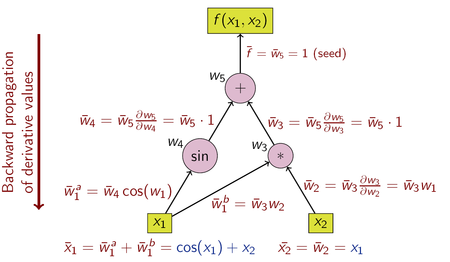

After [Wikipedia](https://en.wikipedia.org/wiki/Automatic_differentiation#Reverse_accumulation).

To train deep learning models we will use the same way of computing derivatives. The only difficulty will be that we will work at a slightly higher level of abstraction: the signals flowing through the network will not be limited to scalars, but will also be vectors, matrices, or higher order tensors.

*A note on terminology*: in these notes, we will use the terms derivative and gradient interchangably. Moreover, we will assume that we always compute the derivative of a scalar term, with respect to a scalar, vector, matrix, or a higher order tensor. By definition the derivative/gradient $\frac{\partial l}{\partial T}$ will have the same shape as $T$. This convention is common to all popular deep learning frameworks. Furthermore, we will abuse the notation and allow multiplication by the Jacobian even for these higher order tensors - sometimes this is possible to express using matrix algebra, but sometimes we will use extensions such as elementwise operations. As we will soon see, deep learning frameworks internally use building bricks for which one has to define the forward computation (how to compute the input based on the output) and the backaward computation (return the gradients of the loss with respect to brick inputs, given gradients with respect to brick outputs).


### Forward and backward pass in a neural network with 1 hidden layer

Lets gain some intuitions by looking at gradient computations in a network with one hidden layer:

The forward (from metwork inputs to outputs) computations are as follows:
\begin{equation}
\begin{split}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma(A_2) & \qquad\text{Output of the network}
\end{split}
\end{equation}
where $\sigma$ is the logistic sigmoid.

Finally, if the network is trained for classification we derive a loss function in exactly the same way as for logistic regression. First, assume that: 
$$
p(y|x) = O_2(x).
$$

Then the cross-entropy loss (negative log of the likelihood) on the data sample $x^{(i)}, y^{(i)}$is:
$$
L(x^{(i)}, y^{(i)}) = -y^{(i)}\log(O_2(x^{(i)})) - (1-y^{(i)})\log(1 - O_2(x^{(i)}))
$$

To compute the gradient with respect to network inputs, we will work with the equations in reverse order.

Start with 
$$
\begin{split}
\frac{\partial L^{(i)}}{\partial A_2^{(i)}} &= \frac{\partial(-y^{(i)}\log(O_2^{(i)}) - (1-y^{(i)})\log(1 - O_2^{(i)}))}{\partial A_2^{(i)}} \\
&= -y^{(i)}\frac{\sigma(A_2^{(i)})(1-\sigma(A_2^{(i)}))}{\sigma(A_2^{(i)})} + 
(1-y^{(i)})\frac{\sigma(A_2^{(i)})(1-\sigma(A_2^{(i)}))}{1-\sigma(A_2^{(i)})} \\
&= -y^{(i)}(1-\sigma(A_2^{(i)})) + (1-y^{(i)})\sigma(A_2^{(i)})\\
&=\sigma(A_2^{(i)})-y^{(i)} = O_2^{(i)}-y^{(i)}
\end{split}
$$

where we have used the fact that 
$$
\frac{\partial}{\partial a}\sigma(a) = \sigma(a)(1-\sigma(a))
$$

Now let's compute the gradient of the loss with respect to $O_1$:

$$
\begin{split}
\frac{\partial L^{(i)}}{\partial O_1^{(i)}} &= \frac{\partial L^{(i)}}{\partial A_2^{(i)}}\frac{\partial A_2^{(i)}}{\partial O_1^{(i)}} 
= \frac{\partial L^{(i)}}{\partial A_2^{(i)}}W_2 
\end{split}
$$

Please note, that we already have $\frac{\partial L^{(i)}}{\partial A_2^{(i)}}$. 

Continuing, we compute
$$
\frac{\partial L^{(i)}}{\partial A_1^{(i)}} = \frac{\partial L^{(i)}}{\partial O_1^{(i)}}\frac{\partial O_1^{(i)}}{\partial A_1^{(i)}} = \frac{\partial L^{(i)}}{\partial O_1^{(i)}} \bigodot \sigma(A_1) \bigodot(1-\sigma(A_1)),
$$

where $\bigodot$ denotes elementwise multiplication.

Finally, we can compute the gradients with respect to the parameters:
$$
\begin{split}
\frac{\partial L^{(i)}}{\partial b_2} &= \frac{\partial L^{(i)}}{\partial A_2^{(i)}}\frac{\partial A_2^{(i)}}{\partial b_2} = \frac{\partial L^{(i)}}{\partial A_2^{(i)}} \text{ (when implemented on minibatches, this has to include a sum over examples)}\\
\frac{\partial L^{(i)}}{\partial W_2} &= \left(\frac{\partial L^{(i)}}{\partial A_2^{(i)}}\right)^T\frac{\partial A_2^{(i)}}{\partial W_2} = \left(\frac{\partial L^{(i)}}{\partial A_2^{(i)}}\right)^T O_1^{(i)} \text{ (this expression is valid for batches of data, because the matmul does a summation)}\\
\frac{\partial L^{(i)}}{\partial b_1} &= \frac{\partial L^{(i)}}{\partial A_1^{(i)}}\frac{\partial A_1^{(i)}}{\partial b_1} = \frac{\partial L^{(i)}}{\partial A_1^{(i)}}  \text{ (when implemented on minibatches, this has to include a sum over examples)} \\
\frac{\partial L^{(i)}}{\partial W_1} &= \left(\frac{\partial L^{(i)}}{\partial A_1^{(i)}}\right)^T\frac{\partial A_1^{(i)}}{\partial W_1} = \left(\frac{\partial L^{(i)}}{\partial A_1^{(i)}}\right)^T x^{(i)} \text{ (this expression is valid for batches of data, because the matmul does a summation)}
\end{split}
$$

In the equations we have slightly abused the mathematical notation, to keep with our convention on gradient shape (this the reason for the seemingly unnecessary transposes in the equations to compute the gradients with respect to weigths). When I am writing derivative code, I usually derive the equation for single elements of the matrix, then figure out what matrix formulas will yield the same result.

In fact, the equations above will also work when $x$ is a matrix of examples. Then the loss has to be summed over all examples in the minibatch and the derivative with respect to the bias has to be summed as well. The derivatives with respect to the weigths contain an implicit sum over all examples in the batch in the matrix multiplications.




Ispecting the equation for derivative computation, we can see a certain order of operations. The computation proceed in the opposite order to the forward pass. In fact, in the forward pass contains a computation of the form

$$
O = f(I)
$$

then the gradient
$$
\frac{\partial L}{\partial I} = \frac{\partial L}{\partial O}\frac{\partial O}{\partial I}
$$

in this equaion $\frac{\partial L}{\partial O}$ is known, as it was computed earlier, and computing $\frac{\partial O}{\partial I}$ only requires the knowledge about the function $f$. This allows modular implementations of the backpropagation algorithm.

Consider the implementation of the logistic sigmoid. We summarize its forward and backward passes in the picture below:

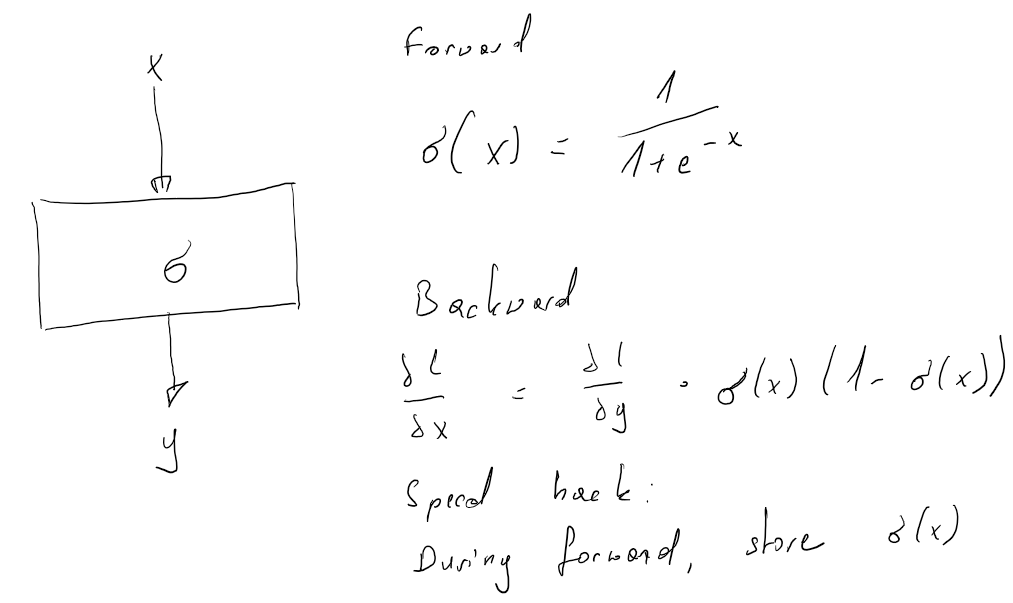

The module's implementation essentially provides two functions:
1. Forward, which takes the input $x$ and returnsthe output $y$
2. Backward, which takes the derivative of the loss with respect to the modules output $\frac{\partial l}{\partial y}$ and has to internally multiply it by the Jacobian, returning $\frac{\partial l}{\partial x}$.

Finally, we notice that certain values, in this case the term $\sigma(x)$ are computed during the forward pass, but can be reused during backward. Implementations often provide a mechanism to store them.

As a case in point, consider the autograd implementation in [PyTorch](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function):

```python
class Exp(Function):
    @staticmethod
    def forward(ctx, i):
        result = i.exp()
        ctx.save_for_backward(result)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        result, = ctx.saved_tensors
        return grad_output * result

#Use it by calling the apply method:
output = Exp.apply(input)
```

The `Function` interface requires the author to provide implementation for `forward` and `backward`, and provides the `context` mechanism to store results computed during forward for use in backward.

### From neural networks to computational graphs

In a modern deep learning framework such as pytorch we rarely deal with individual neurons, but with grops of them (e.g. a vector containing activations). The computations, such as matrix operations, nonlinear function applications and so on are arranged into a computational graph. The toolkits often handle graph construction either explicitely, by defining objects for graph nodes and overloading popular operators (this was used in Theano of Tensorflow), or implicitely, by tracing the operations performed by a program (e.g PyTorch).

The picture below shows a computational graph for a two layer neural network.

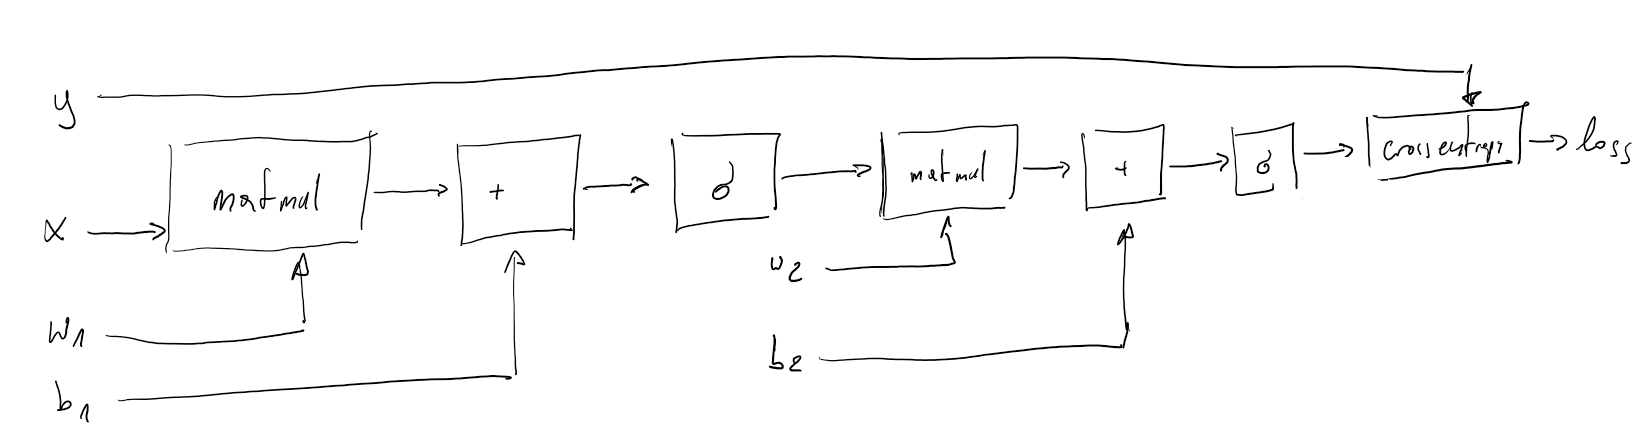

### A typical training loop

Having computed the derivatives we can start training neural networks. We often use simple first order methods, which are more resilient to the pathologies of the landscape of the optimization problem: second order methods converge faster for convex problems, but as we have seen neural netwrok's loss is non-convex and most teoretical guarantees are not applicable.

The pseudocode for a training loop is as follows (in a convention ressembling PyTorch):
```python
net = construct_a_computational_graph()

# params is a list of tensors (scalars, vectors, matrices, etc.) which must be optimized
params = net.get_tunable_parameters()

for p in params:
    random_initalization(p)

while not converged:
    # X and Y may be the full data set, may be a fraction of it
    X, Y = sample_data_batch()
    loss = compute_loss(net(X), Y)
    # run the automatic differentiation on the graph
    gradients = backpropagate(net, loss)
    # apply the first order gradient descent
    for p, g in zip(params, gradients):
        p -= step_size * gradient
```

Conceptually, training is easy:
- randomly initialize the network parameters
- on some data compute the loss during a forward pass, then the gradients during the backward pass
- apply the gradients.

What is challenging, is to set many hyperparameters, such as the step size (also called the learning rate), or the initial random distributions, in a way which would yield th best results. Unfortunately, this requires lots of experiments and experience - deep learning is powerful, but we pay for this power by having to solve problems with no theoretical guarantees.

## Intuitions on neural network training.

To uderstand what is happening inside of a neural network during training let's briefly get back to logistic regression. For simplicity, let's ignore the bias term and assume computations on a single example only. Then:
1. Forward pass computes

   $$
   O(x, w) = \sigma(xw^T)
   l(x, y, w) =  -y\log O(x, w) + (1-)\log  (1 - O(x, w))
   $$

2. The backward pass computes

   $$
   \frac{\partial l}{\partial w} = (o(x,w) - y)x
   $$

This formula has a nice interpretation: $o(x,w) - y$ is the error term. It is small when then network is correct ($o(x,w) \approx y$). The gradient step then makes only a tiny change to $w$. When the network is wrong, we change the weight vector to make the correct output more plausible.

Assume $y=1$ and the network made a mistake. Then $o(x,w) << 1$ and $e=(o(x,w) - y)$ is negative. The updated weight is 
$$
w' = w - \alpha e x
$$

Notice that 

$$
x w'^T = x(w^t - \alpha e x^T) = xw^T -\alpha e ||x||^2 > xw^T
$$
because $-\alpha e > 0$.

Logistic sigmoid is monotonic, thus $O(x, w') > O(x, w)$. The network made a mistake and after the update it returns a value closer to the desired one.



### The perceptron learning algorithm

The perceptron is a model similar to the logistic regression which uses a hard hreshold function rather than then smooth logistic sigmoid. It's learning rule is very similar to the one of loistic regression:

In a loop:
1. query the network on a single example
2. if the network was correct, do nothing
3. if it was wrong, move the weights slightly towards the input $x$

This learnig algorithm was studied since 1950s! It is somewhat biologically plausible: the single neuron recieves feedback, then based on the feedback it reinforces or inhibts its connections to the current input. Everything happens locally.


### Weigth transport problem

Error backpropagation can be seen as a slight extension of the Perceptron learning: we use smooth activation functions, and extend the backward phase in a way in which each neuron informs the neurons whose output it consumed about the derivative term (that it is it tells them how a tiny change in a weight will impact the loss function).

The backpropagation mechanism is however biologically implausible (for a nice broader explanation please see the recent [Quanta Magazine article](https://www.quantamagazine.org/artificial-neural-nets-finally-yield-clues-to-how-brains-learn-20210218/)). During a forward pass, eachneuron reads its inputs. This is easy. However, the synapses in the brain are uni-directional, the neuron can't notify the neurons it reads about the derivative signal! This notification would require other symapses that are used wuring backward phase, whose strengths are always in sync with the synapses used during the forward pass. This instanteous synchronization of weigths is called the weigth transport problem. In one of the assignments you can explore a solution to it, called _feedback alignment_, in which we allow the two sets of synapses to be unsynchronized.

Mathematically, the weight transport problem is visible in the forward and backward pass equations: the forward pass uses the transposition of the weigth matrix, while the backward pass uses the untransposed matrix. In fact the transport problem is also visible in the prformnce of matrix multiplications: due to memory organization on a computer, multiplication $AB^T$ is faster than multiplication $AB$ which requires non-contiguous access to the memory.

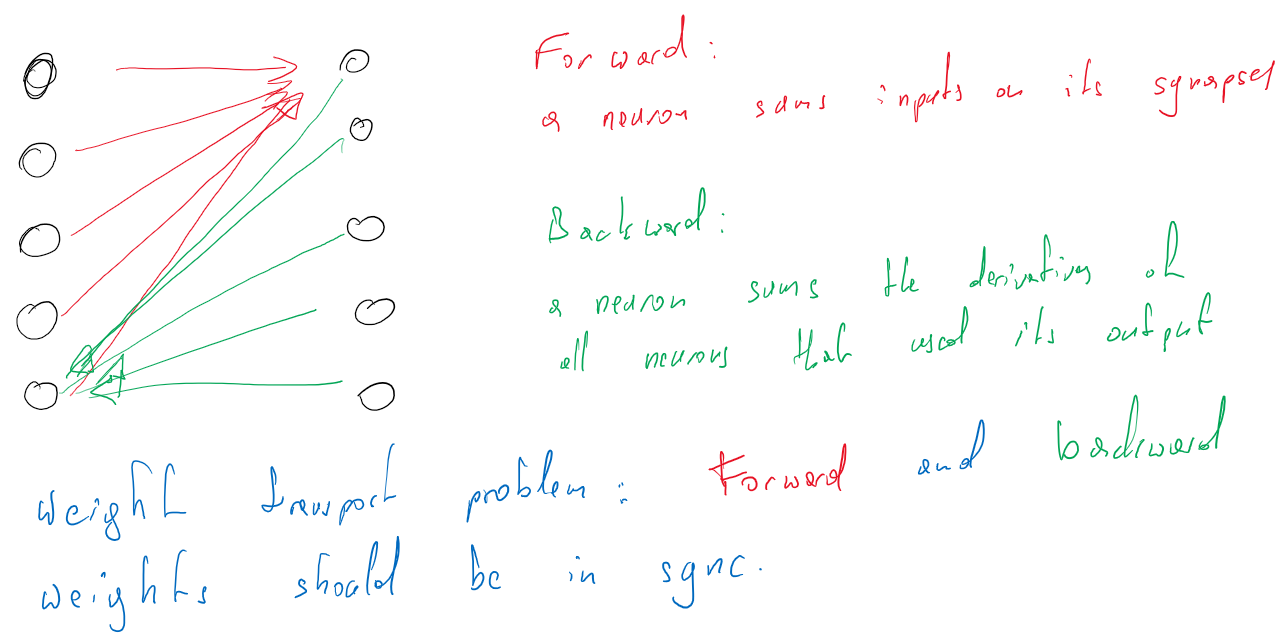

## Summary

Deep neural networks consist of multiple layers of simple computational units called neurons. All neurons perform simple computations: a weighted sum of their inputs, followed by an almost everywhere differentiable nonlinearity. 

The network is trained by changing values of weights (and biases) of the neurons using gradient-based optimizatoin techniques. Derivatives are computed using automatic differentiation, which in deep learning is often called error backpropagation.

First order gradient descent (especially SGD, its stochastic variant, which makes the update based on the gradient computed on a small fraction of training data) is extremely powerful despite its simplicity. It is the workhorse of training deep neural networks.

The optimization problem solved during neural network training is non-convex and care must be taken to all the details, such as step sizes, magnitudes of the weights and biases, magnitudes of the values that flow through the network and of the gradients, etc. This makes training deep neural networks challenging (but when they work, they often work spectacularly well).

Backpropagation algorithm was proposed by Hinton et al as a way of learning useful hidden representations without their direct supervision (wo only tell the network the input-output pairs, and let it choose the intermediate values freely). Backpropagation was controversial due to the biological implausibilty caused by the weigth transport problem. However, after 35 years backpropagatoin is still the most reliable way to train deep networks.

Modern deep learning toolkits deal not that much with neurons, as with building complex differentiable computation graphs, with parameters that can be set ud=sing gradient techniques. Often, specialized blocks are designed, e.g. NVidia implemented a [differentiable rendering pipeline](https://research.nvidia.com/publication/2020-11_Modular-Primitives-for) to be used in deep learning models for image synthesis. One can learn e.g. to take an image and extract from it textures, geometry and pose parameters that can be used to resynthesize the original image. The textures and geometry can then be used to render new views of the objects in the image.